China Data Head:
        name  issue_comment  open_issue  open_pull  review_comment  \
0    Alibaba         111972       22397      35266           48412   
1      Baidu          79370       15580      27414           35072   
2  Ant group          83116       15944      17940           20815   
3    PingCAP         167814        8155      23052           60402   
4    Tencent          39949       10162      20777            7650   

   merged_pull  rank      value  rankDelta  valueDelta  
0        26732     1  103368.49          0    21093.11  
1        21680     2   71636.82          0    10032.08  
2        14464     3   61897.32          0     6380.83  
3        18380     4   48527.89          0     2329.36  
4        17725     5   39080.82          0    12565.41  

Global Data Head:
        name  issue_comment  open_issue  open_pull  review_comment  \
0  Microsoft        1437317      189185     309685          456166   
1     Google         642832       69221     130672          1

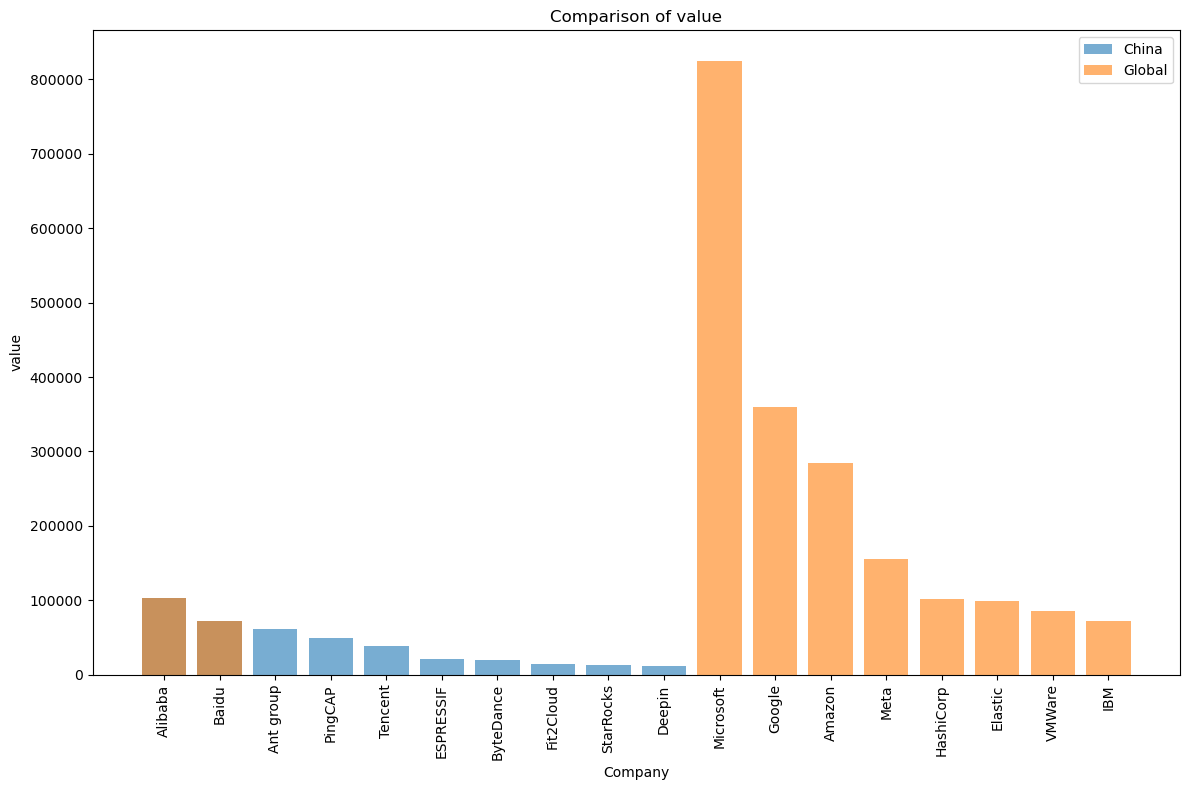

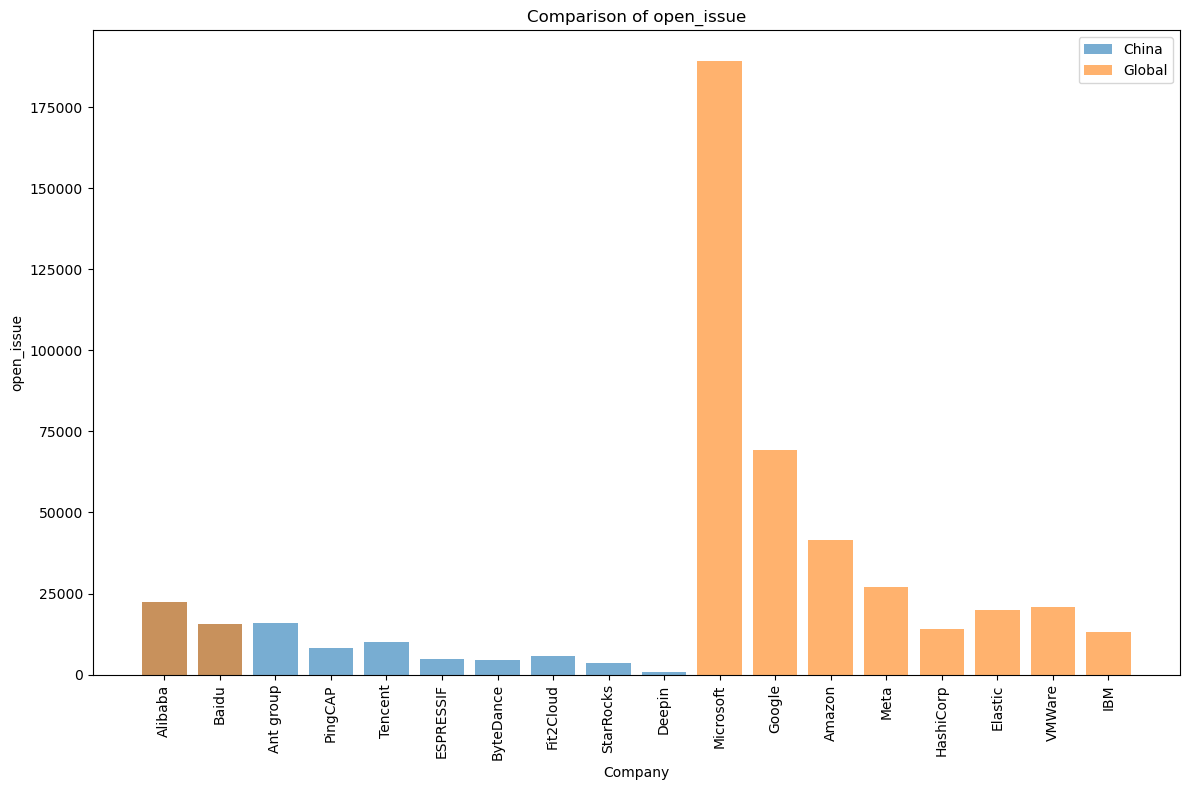

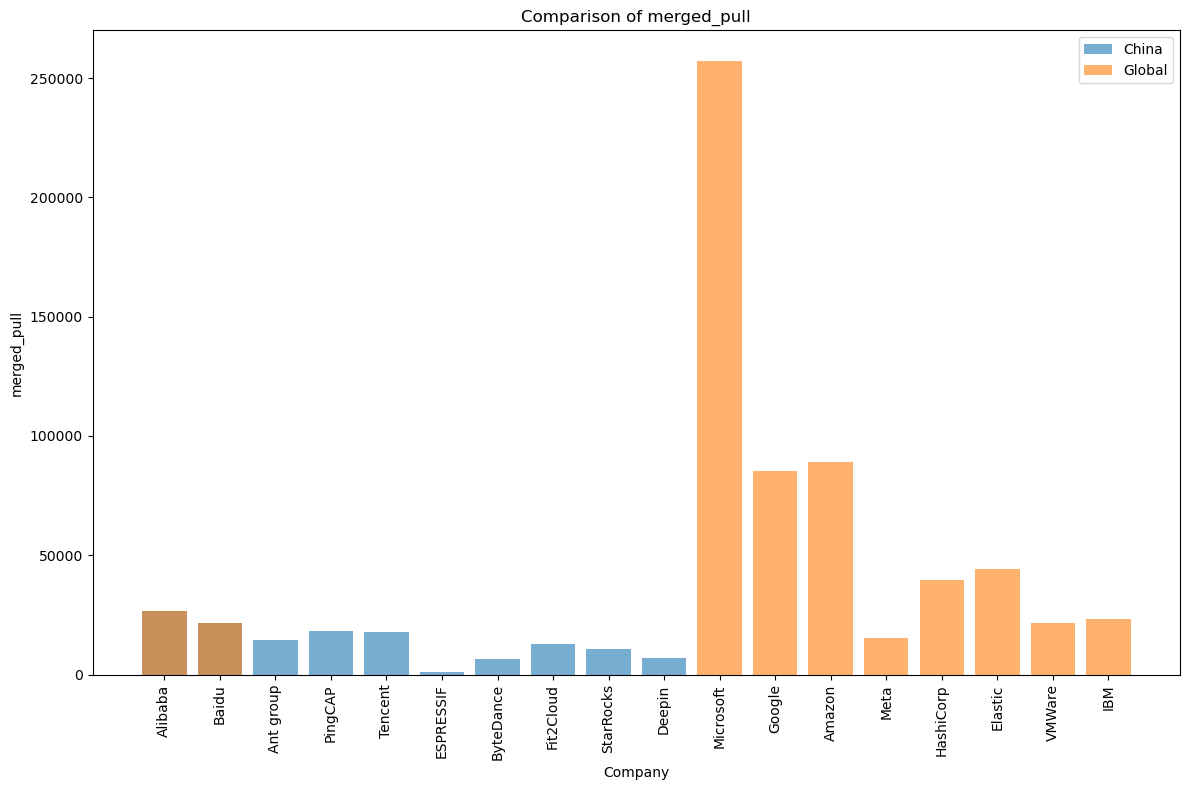

In [2]:
import pandas as pd
# 定义一个函数，用于计算并返回一个DataFrame列的描述性统计结果
def descriptive_stats(df):
    # 初始化一个DataFrame,它用来存放对一个列的分析结果
    stats = pd.DataFrame({
        'Mean': [df.mean()],
        'Median': [df.median()],
        'Max': [df.max()],
        'Min': [df.min()],
        'Std': [df.std()]
    })
    return stats

# 读取CSV文件
china_df = pd.read_csv('china_2022.csv')
global_df = pd.read_csv('global_2022.csv')

# 显示数据框架的头部信息以确认数据加载正确
print("China Data Head:")
print(china_df.head())
print("\nGlobal Data Head:")
print(global_df.head())

# 比较各个指标的描述性统计
print("\nDescriptive Statistics Comparison:")
# 遍历指定的列，计算并打印中国和全球数据的描述性统计量
for column in ['issue_comment', 'open_issue', 'open_pull', 'review_comment', 'merged_pull', 'value']:
    china_stats = descriptive_stats(china_df[column])
    global_stats = descriptive_stats(global_df[column])
    print(f"\n{column}:")
    print("China:\n",china_stats)
    print("Global:\n",global_stats)

# 选择几个关键指标进行可视化比较
import matplotlib.pyplot as plt
# 定义一个函数，用于可视化比较中国和全球数据的关键指标
def plot_comparison(df1, df2, column):
    plt.figure(figsize=(12, 8))
    plt.bar(df1['name'], df1[column], label='China', alpha=0.6)
    plt.bar(df2['name'], df2[column], label='Global', alpha=0.6)
    plt.title(f'Comparison of {column}')
    plt.xlabel('Company')
    plt.ylabel(column)
    plt.xticks(rotation=90)  # 旋转横轴标签
    plt.legend()
    plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
    plt.show()

# 选择几个关键指标进行可视化比较
plot_comparison(china_df, global_df, 'value')
plot_comparison(china_df, global_df, 'open_issue')
plot_comparison(china_df, global_df, 'merged_pull')

